In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv('Holiday_Package.csv')

In [3]:
df.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [4]:
df.shape

(872, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
Unnamed: 0           872 non-null int64
Holliday_Package     872 non-null object
Salary               872 non-null int64
age                  872 non-null int64
educ                 872 non-null int64
no_young_children    872 non-null int64
no_older_children    872 non-null int64
foreign              872 non-null object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


In [6]:
df.describe(include ='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,872,NaN,NaN,NaN,436.5,251.869,1,218.75,436.5,654.25,872
Holliday_Package,872,2,no,471,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,872,NaN,NaN,NaN,47729.2,23418.7,1322,35324,41903.5,53469.5,236961
age,872,NaN,NaN,NaN,39.9553,10.5517,20,32,39,48,62
educ,872,NaN,NaN,NaN,9.30734,3.03626,1,8,9,12,21
no_young_children,872,NaN,NaN,NaN,0.311927,0.61287,0,0,0,0,3
no_older_children,872,NaN,NaN,NaN,0.982798,1.08679,0,0,1,2,6
foreign,872,2,no,656,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Null Value

In [7]:
df.isnull().sum()

Unnamed: 0           0
Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

### Duplicate Value 

In [8]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


### unique values for categorical variables

In [9]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

HOLLIDAY_PACKAGE :  2
yes    401
no     471
Name: Holliday_Package, dtype: int64


FOREIGN :  2
yes    216
no     656
Name: foreign, dtype: int64




In [10]:
df.Holliday_Package.value_counts(1)

no     0.540138
yes    0.459862
Name: Holliday_Package, dtype: float64

Text(0.5, 1.0, 'no_older_children Distribution')

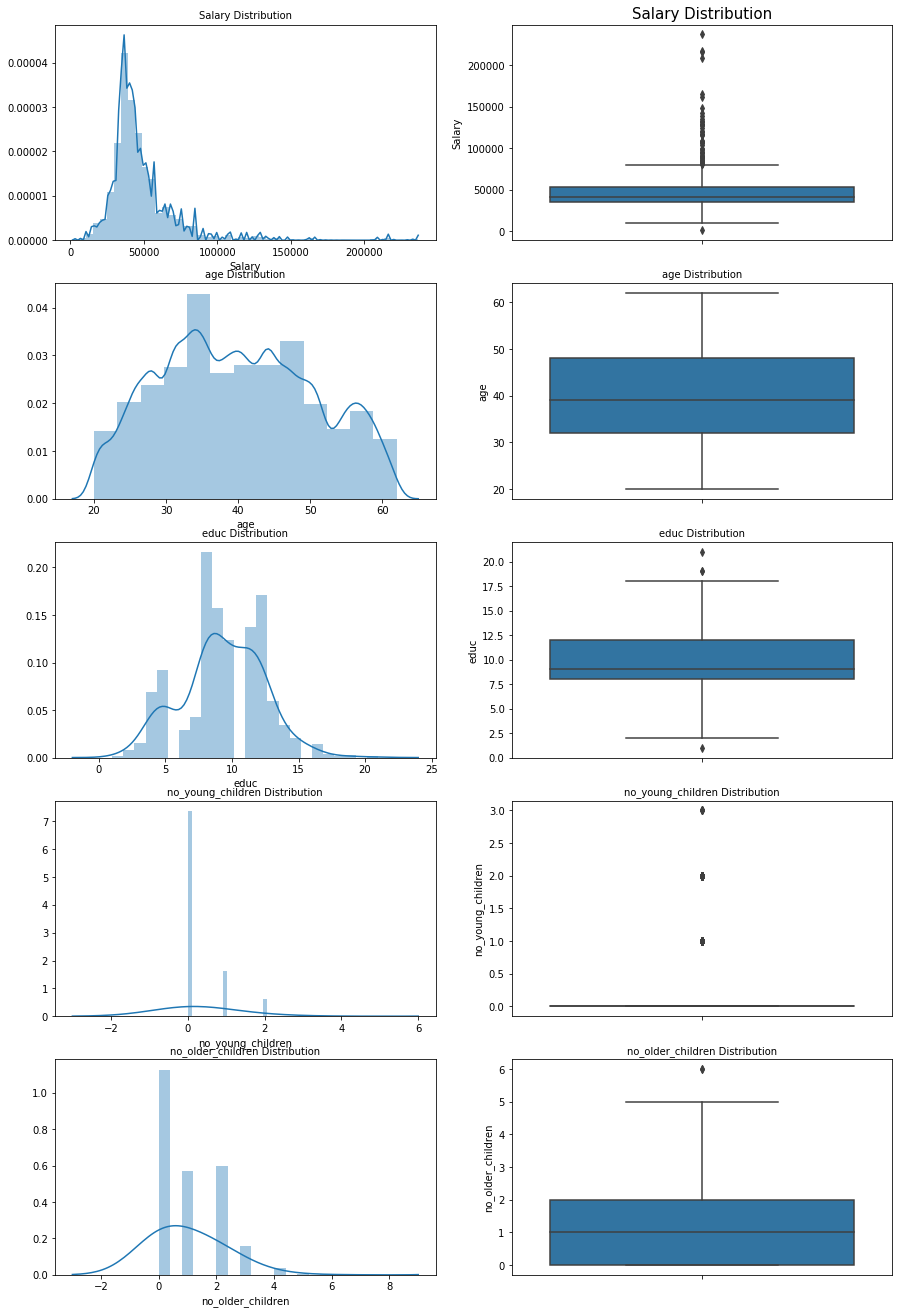

In [11]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(15, 23)

a = sns.distplot(df['Salary'], kde_kws = {'bw' : 1}, ax=axes[0][0])
a.set_title("Salary Distribution",fontsize=10)

a = sns.boxplot(df['Salary'] , orient = "v" , ax=axes[0][1])
a.set_title("Salary Distribution",fontsize=15)

a = sns.distplot(df['age'], kde_kws = {'bw' : 1}, ax=axes[1][0])
a.set_title("age Distribution",fontsize=10)

a = sns.boxplot(df['age'] , orient = "v" , ax=axes[1][1])
a.set_title("age Distribution",fontsize=10)

a = sns.distplot(df['educ'],  kde_kws = {'bw' : 1}, ax=axes[2][0])
a.set_title("educ Distribution",fontsize=10)

a = sns.boxplot(df['educ'] , orient = "v" , ax=axes[2][1])
a.set_title("educ Distribution",fontsize=10)

a = sns.distplot(df['no_young_children'],  kde_kws = {'bw' : 1}, ax=axes[3][0])
a.set_title("no_young_children Distribution",fontsize=10)

a = sns.boxplot(df['no_young_children'] , orient = "v" , ax=axes[3][1])
a.set_title("no_young_children Distribution",fontsize=10)

a = sns.distplot(df['no_older_children'], kde_kws = {'bw' : 1}, ax=axes[4][0])
a.set_title("no_older_children Distribution",fontsize=10)

a = sns.boxplot(df['no_older_children'] , orient = "v" , ax=axes[4][1])
a.set_title("no_older_children Distribution",fontsize=10)

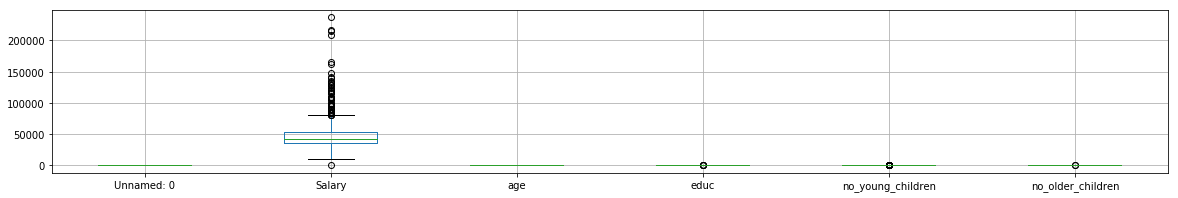

In [12]:
df.boxplot(figsize= (20,3))

In [13]:
def detect_outliers(dataframe):
    cols = list(dataframe)
    
    for column in cols:
        if column in dataframe.select_dtypes(include=np.number).columns:
            q1 = dataframe[column].quantile(0.25)
            q3 = dataframe[column].quantile(0.75)
            iqr = q3 - q1
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)

            print(column + ' ---------', dataframe.loc[(dataframe[column] < fence_low) | (dataframe[column] > fence_high)].shape[0])

detect_outliers(df)

Unnamed: 0 --------- 0
Salary --------- 57
age --------- 0
educ --------- 4
no_young_children --------- 207
no_older_children --------- 2


In [14]:
df.columns

Index(['Unnamed: 0', 'Holliday_Package', 'Salary', 'age', 'educ',
       'no_young_children', 'no_older_children', 'foreign'],
      dtype='object')

In [15]:
df.skew()

Unnamed: 0           0.000000
Salary               3.103216
age                  0.146412
educ                -0.045501
no_young_children    1.946515
no_older_children    0.953951
dtype: float64

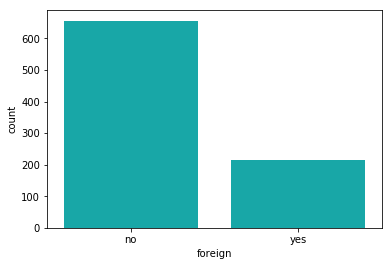

In [16]:
sns.countplot(x="foreign", data=df, color="c")

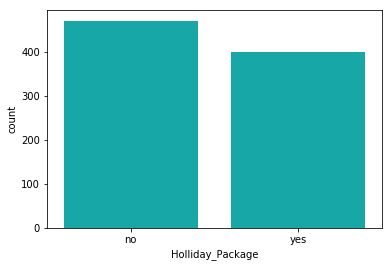

In [17]:
sns.countplot(x="Holliday_Package", data=df, color="c")

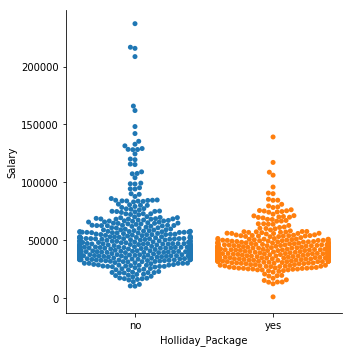

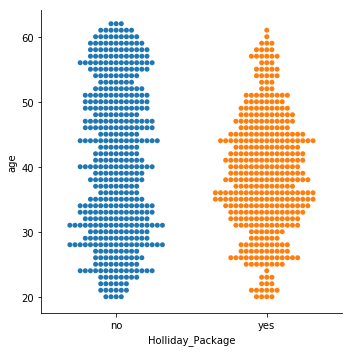

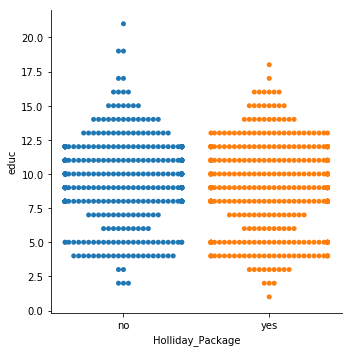

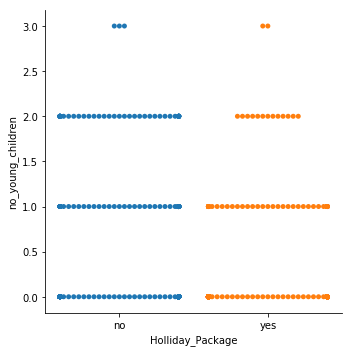

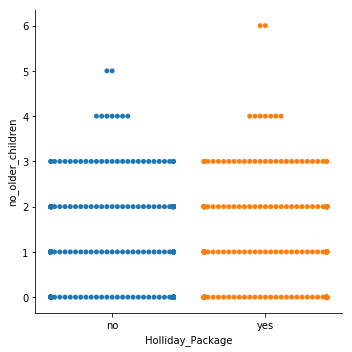

In [18]:
sns.catplot(x="Holliday_Package", y="Salary",kind="swarm",data=df)
sns.catplot(x="Holliday_Package", y="age",kind="swarm",data=df)
sns.catplot(x="Holliday_Package", y="educ",kind="swarm",data=df)
sns.catplot(x="Holliday_Package", y="no_young_children",kind="swarm",data=df)
sns.catplot(x="Holliday_Package", y="no_older_children",kind="swarm",data=df)

In [19]:
df.groupby(["Holliday_Package"]).count()

,Unnamed: 0,Salary,age,educ,no_young_children,no_older_children,foreign
Holliday_Package,,,,,,,
no,471,471,471,471,471,471,471
yes,401,401,401,401,401,401,401


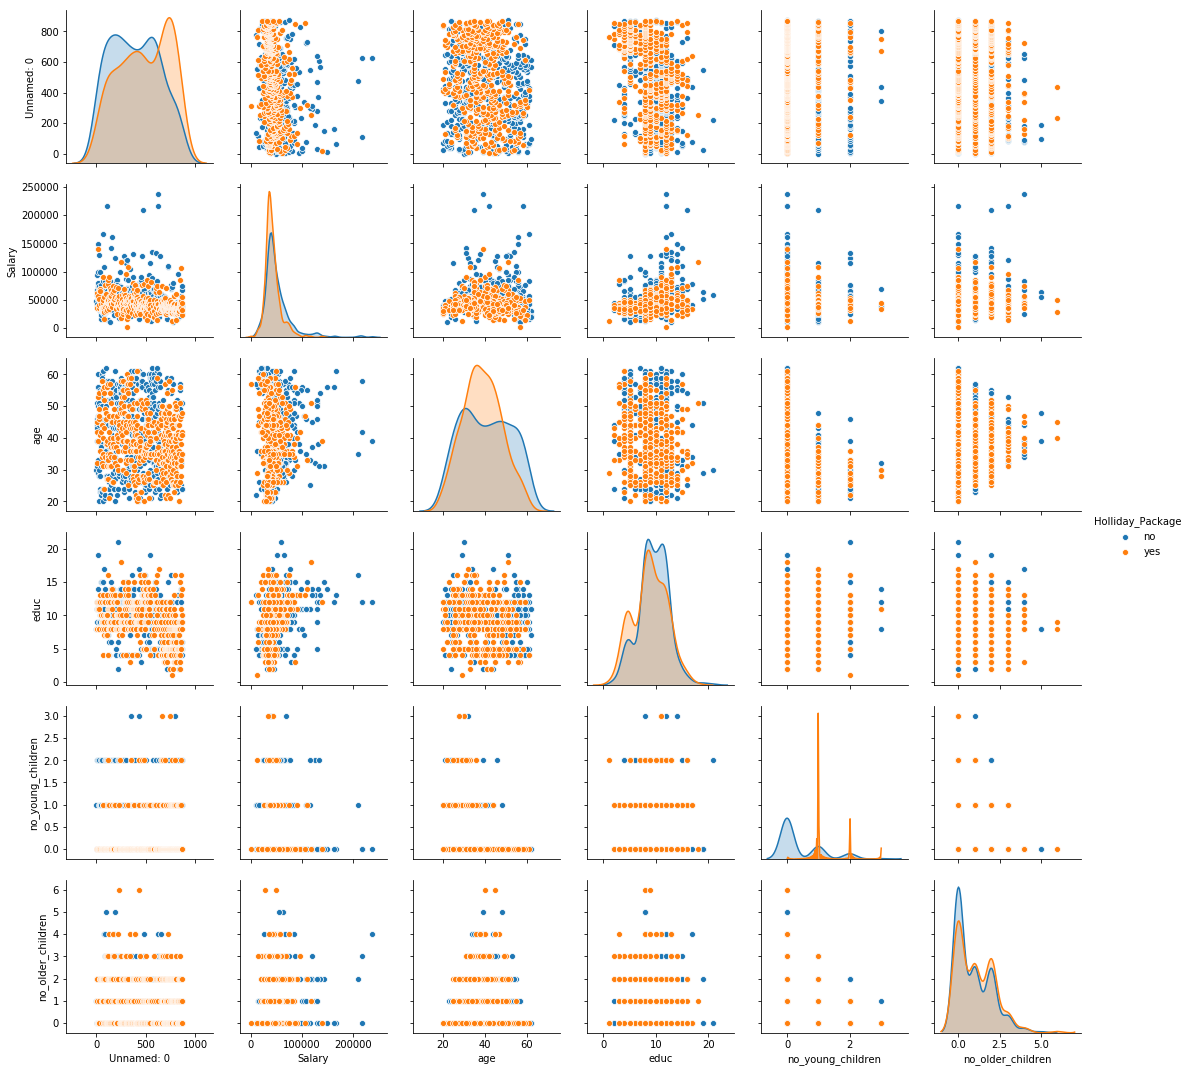

In [20]:
sns.pairplot(df ,diag_kind='kde' ,hue='Holliday_Package')
plt.show()

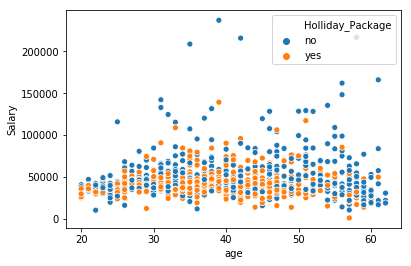

In [21]:
sns.scatterplot(data = df, x='age',y='Salary', hue = 'Holliday_Package')

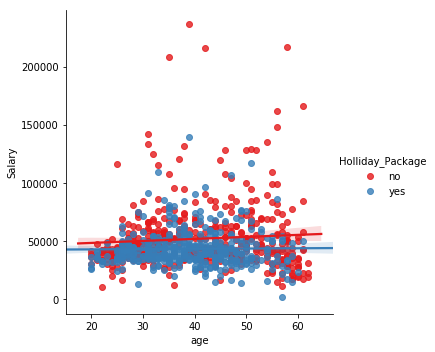

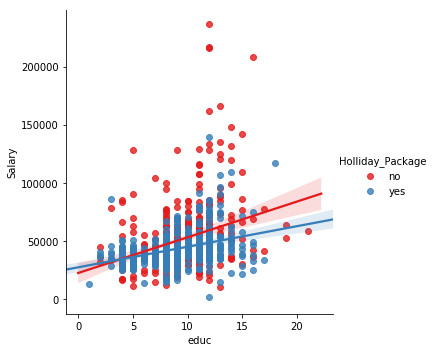

In [22]:
sns.lmplot(x="age", y="Salary", hue="Holliday_Package", data=df,
               palette="Set1")

sns.lmplot(x="educ", y="Salary", hue="Holliday_Package", data=df,
               palette="Set1")

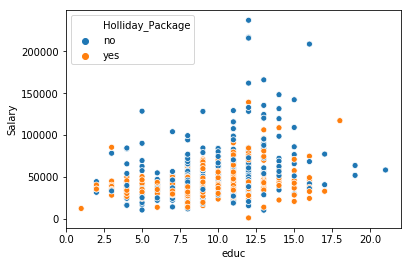

In [23]:
sns.scatterplot(data = df, x='educ',y='Salary', hue = 'Holliday_Package')

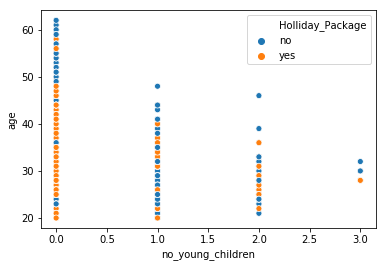

In [24]:

sns.scatterplot(data = df, x='no_young_children',y='age', hue = 'Holliday_Package')

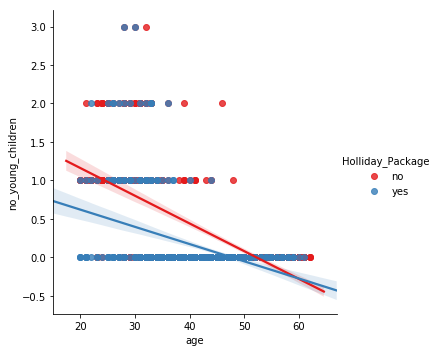

In [25]:
sns.lmplot(x="age", y="no_young_children", hue="Holliday_Package", data=df,
               palette="Set1")

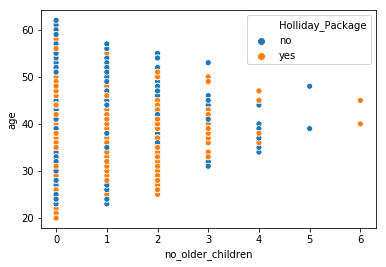

In [26]:
sns.scatterplot(data = df, x='no_older_children',y='age', hue = 'Holliday_Package')

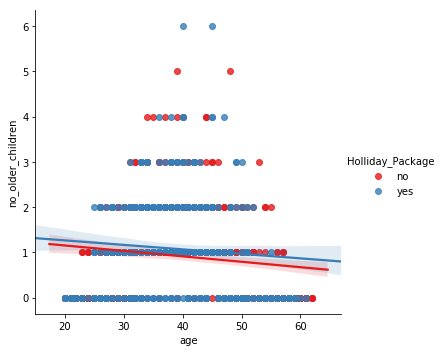

In [27]:
sns.lmplot(x="age", y="no_older_children", hue="Holliday_Package", data=df,
               palette="Set1")

In [28]:
df.columns

Index(['Unnamed: 0', 'Holliday_Package', 'Salary', 'age', 'educ',
       'no_young_children', 'no_older_children', 'foreign'],
      dtype='object')

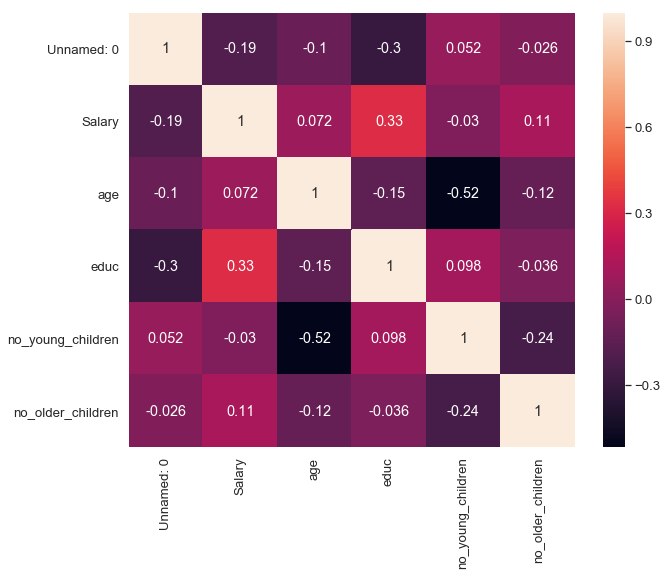

In [29]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(df[['Unnamed: 0', 'Holliday_Package', 'Salary', 'age', 'educ', 'no_young_children', 'no_older_children','foreign']].corr(), annot=True)

In [30]:
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='object')].index

In [31]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [32]:
for column in df[cont].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

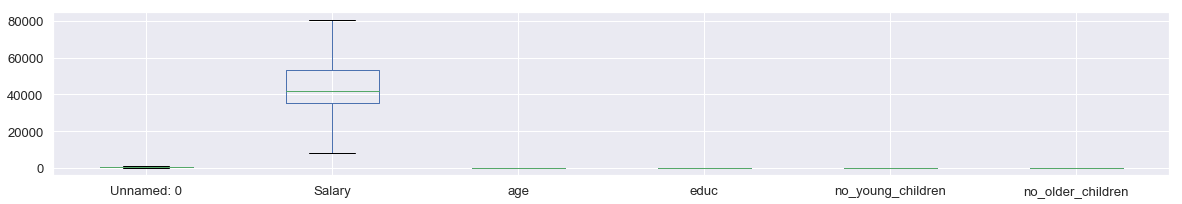

In [33]:
df.boxplot(figsize= (20,3))

In [34]:
def detect_outliers(dataframe):
    cols = list(dataframe)
    
    for column in cols:
        if column in dataframe.select_dtypes(include=np.number).columns:
            q1 = dataframe[column].quantile(0.25)
            q3 = dataframe[column].quantile(0.75)
            iqr = q3 - q1
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)

            print(column + ' ---------', dataframe.loc[(dataframe[column] < fence_low) | (dataframe[column] > fence_high)].shape[0])

detect_outliers(df)

Unnamed: 0 --------- 0
Salary --------- 0
age --------- 0
educ --------- 0
no_young_children --------- 0
no_older_children --------- 0


In [35]:
df1 = df.drop(columns=['Unnamed: 0'], axis=1)

In [36]:
df1.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412.0,30.0,8.0,0.0,1.0,no
1,yes,37207.0,45.0,8.0,0.0,1.0,no
2,no,58022.0,46.0,9.0,0.0,0.0,no
3,no,66503.0,31.0,11.0,0.0,0.0,no
4,no,66734.0,44.0,12.0,0.0,2.0,no


In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
Holliday_Package     872 non-null object
Salary               872 non-null float64
age                  872 non-null float64
educ                 872 non-null float64
no_young_children    872 non-null float64
no_older_children    872 non-null float64
foreign              872 non-null object
dtypes: float64(5), object(2)
memory usage: 47.8+ KB


In [38]:
df2 = df1.copy()

In [39]:
data = pd.get_dummies(df2, columns=['Holliday_Package','foreign'], drop_first = True)

In [40]:
data.head()

,Salary,age,educ,no_young_children,no_older_children,Holliday_Package_yes,foreign_yes
0,48412.0,30.0,8.0,0.0,1.0,0,0
1,37207.0,45.0,8.0,0.0,1.0,1,0
2,58022.0,46.0,9.0,0.0,0.0,0,0
3,66503.0,31.0,11.0,0.0,0.0,0,0
4,66734.0,44.0,12.0,0.0,2.0,0,0


In [41]:
data.columns

Index(['Salary', 'age', 'educ', 'no_young_children', 'no_older_children',
       'Holliday_Package_yes', 'foreign_yes'],
      dtype='object')

### Train & Test Split

In [42]:
# Copy all the predictor variables into X dataframe
X = data.drop('Holliday_Package_yes', axis=1)

# Copy target into the y dataframe. 
y = data['Holliday_Package_yes']

In [43]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=y)

In [44]:
y_train.value_counts(1)

0    0.539344
1    0.460656
Name: Holliday_Package_yes, dtype: float64

In [45]:
y_test.value_counts(1)

0    0.541985
1    0.458015
Name: Holliday_Package_yes, dtype: float64

In [46]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

0.5305343511450382
[[133   9]
 [114   6]]
              precision    recall  f1-score   support

           0       0.54      0.94      0.68       142
           1       0.40      0.05      0.09       120

    accuracy                           0.53       262
   macro avg       0.47      0.49      0.39       262
weighted avg       0.48      0.53      0.41       262



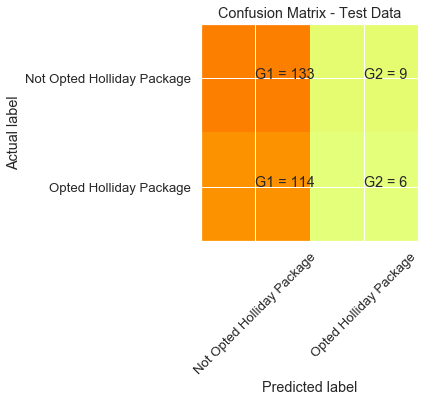

In [47]:
cm = metrics.confusion_matrix(y_test, y_predict)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Not Opted Holliday Package', 'Opted Holliday Package']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

### Predicting on Training and Test dataset

In [48]:
# Prediction on the training set

ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [49]:

ytrain_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [50]:
## Getting the probabilities on the test set

ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.507480,0.492520
1,0.553645,0.446355
2,0.517205,0.482795
3,0.556636,0.443364
4,0.557389,0.442611


In [51]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)

### Prediction

In [52]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

### Training Data and Test Data Confusion Matrix Comparison

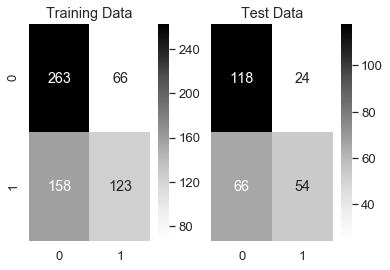

In [53]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

### Training Data and Test Data Classification Report Comparison

In [54]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.62      0.80      0.70       329
           1       0.65      0.44      0.52       281

    accuracy                           0.63       610
   macro avg       0.64      0.62      0.61       610
weighted avg       0.64      0.63      0.62       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.64      0.83      0.72       142
           1       0.69      0.45      0.55       120

    accuracy                           0.66       262
   macro avg       0.67      0.64      0.63       262
weighted avg       0.66      0.66      0.64       262
 



### Probability prediction for the training and test data

In [55]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [56]:
pred_prob_train[:,1]

array([0.73614833, 0.64936462, 0.45296681, 0.67842845, 0.66903745,
       0.3774365 , 0.32146187, 0.43700845, 0.3601507 , 0.62535644,
       0.23288822, 0.26149271, 0.44813877, 0.48143931, 0.29614015,
       0.46145671, 0.43653859, 0.30536315, 0.54175682, 0.66481517,
       0.49405489, 0.31531235, 0.75146336, 0.43228357, 0.31741838,
       0.74742033, 0.24732567, 0.7256214 , 0.49778025, 0.4701221 ,
       0.2458476 , 0.59535195, 0.39263888, 0.38905706, 0.34870239,
       0.34966751, 0.47524197, 0.50165433, 0.47132887, 0.20930823,
       0.22990207, 0.67104116, 0.40365647, 0.62197077, 0.64959972,
       0.34741408, 0.34082919, 0.73390632, 0.42023771, 0.62369484,
       0.57834131, 0.3978419 , 0.49066256, 0.40405466, 0.22000295,
       0.41866697, 0.25849518, 0.5276083 , 0.6674488 , 0.40702718,
       0.59934243, 0.26473066, 0.43421298, 0.34478906, 0.5114521 ,
       0.53275226, 0.41995444, 0.49835656, 0.40640466, 0.33834489,
       0.25698034, 0.65937394, 0.48721781, 0.25848244, 0.71797

AUC for the Training Data: 0.661
AUC for the Test Data: 0.675


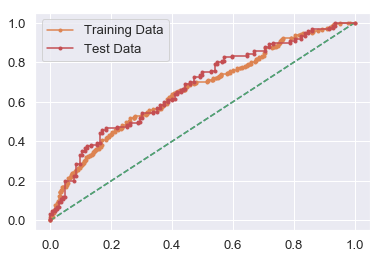

In [57]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

0.1 

Accuracy Score 0.4607
F1 Score 0.6308 

Confusion Matrix


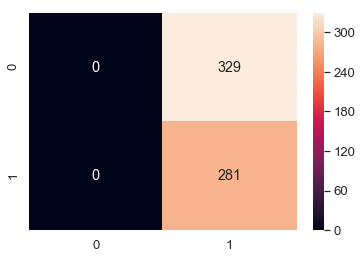

0.2 

Accuracy Score 0.4738
F1 Score 0.6365 

Confusion Matrix


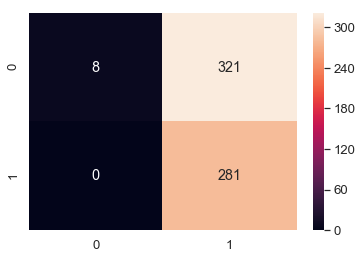

0.3 

Accuracy Score 0.5344
F1 Score 0.6485 

Confusion Matrix


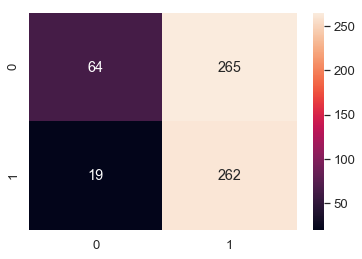

0.4 

Accuracy Score 0.5787
F1 Score 0.6088 

Confusion Matrix


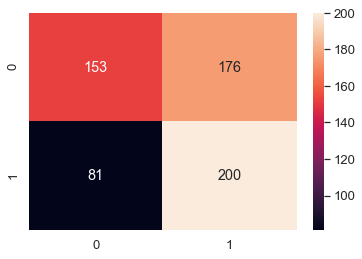

0.5 

Accuracy Score 0.6328
F1 Score 0.5234 

Confusion Matrix


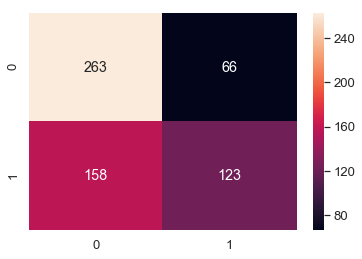

0.6 

Accuracy Score 0.6213
F1 Score 0.446 

Confusion Matrix


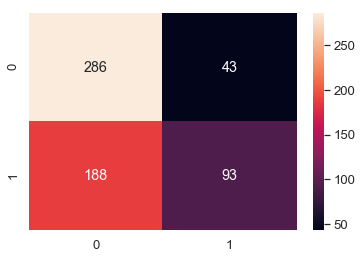

0.7 

Accuracy Score 0.5869
F1 Score 0.2455 

Confusion Matrix


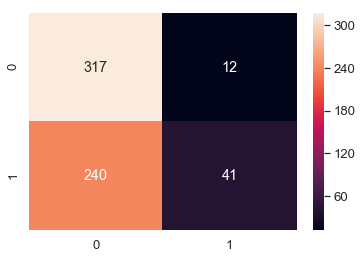

0.8 

Accuracy Score 0.541
F1 Score 0.0071 

Confusion Matrix


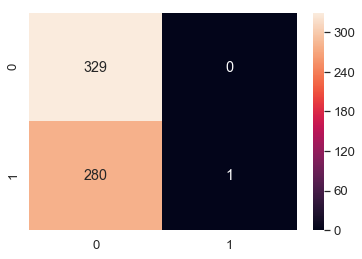

0.9 

Accuracy Score 0.5393
F1 Score 0.0 

Confusion Matrix


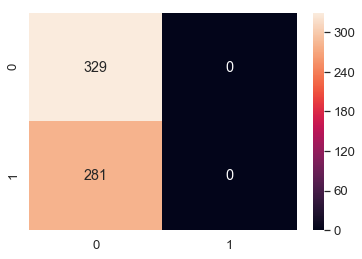

In [58]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_train)):#defining a loop for the length of the test data
        if np.array(pred_prob_train[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

In [59]:
#Predicting the classes on the test data

data_pred_custom_cutoff=[]
for i in range(0,len(pred_prob_test[:,1])):
    if np.array(pred_prob_test[:,1])[i]>0.2:
        a=1
    else:
        a=0
    data_pred_custom_cutoff.append(a)

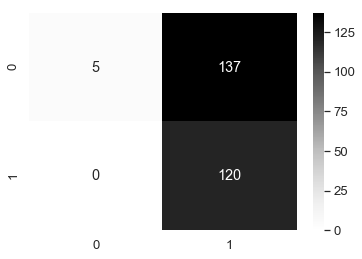

In [60]:
sns.heatmap((metrics.confusion_matrix(y_test,data_pred_custom_cutoff)),annot=True,fmt='.5g',cmap='Greys');

In [61]:
print('Classification Report of the default cut-off test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n\n\n')
print('Classification Report of the custom cut-off test data:\n\n',metrics.classification_report(y_test,data_pred_custom_cutoff),'\n')

Classification Report of the default cut-off test data:

               precision    recall  f1-score   support

           0       0.64      0.83      0.72       142
           1       0.69      0.45      0.55       120

    accuracy                           0.66       262
   macro avg       0.67      0.64      0.63       262
weighted avg       0.66      0.66      0.64       262
 



Classification Report of the custom cut-off test data:

               precision    recall  f1-score   support

           0       1.00      0.04      0.07       142
           1       0.47      1.00      0.64       120

    accuracy                           0.48       262
   macro avg       0.73      0.52      0.35       262
weighted avg       0.76      0.48      0.33       262
 

